In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

In [11]:
# Helper rountines
def plotGraph(x, y, label = 'Question-2', originalData = False):
    plt.figure(figsize=(20,10))
    plt.xlabel('CPU Usage')
    plt.ylabel('Response Time')
    plt.title(label)
    plt.plot(x, y, marker = 'o', label = 'Regression Fit')
    if originalData:
        plt.plot(df['CPU Usage'], df['Response Time'], label = 'Original Data')
        legend = plt.legend(loc='upper left', shadow=True)
    plt.show()
    
def getSSE(YPredict, Y):
    return np.sum((YPredict - Y)**2)

# Vector Implementation of MAPE
# def getMAPE(YPredict, Y):
#     YP = copy.deepcopy(YPredict)
#     YT = copy.deepcopy(Y)
#     #print Y != 0
#     YT = Y[Y != 0]
#     YP = YPredict[Y != 0]
#     print np.any(YT == 0)
#     np.sum(np.abs((YT - YP) / YT)) * 100 / len(YT)

# Iterative Implementation of MAPE
def getMAPE(YPredict, Y):
    tSum = 0.0
    count = np.count_nonzero(Y)
    for i in range(0, len(Y)):
        if Y[i] != 0:
            tSum += np.asscalar(np.abs((Y[i] - YPredict[i])/Y[i]))
    tSum = tSum * 100 / count #len(Y)
    return tSum

In [12]:
df = pd.read_csv('./A5_q2.dat', sep=',', names=['CPU Usage', 'Response Time'])
X = np.array(df['CPU Usage'])
Y = np.array(df['Response Time'])

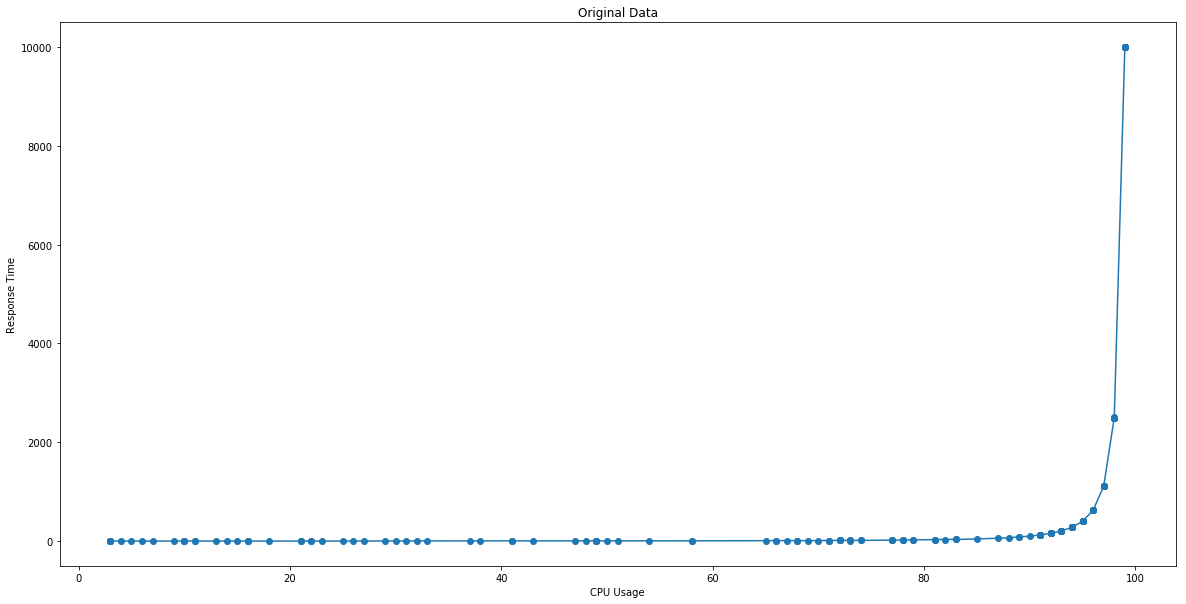

In [13]:
plotGraph(df['CPU Usage'], df['Response Time'], label = 'Original Data')

### Part-A: Using Predictor X : beta_0 = 0 and beta_1 = 1

SSE: 1267567988.7896922
MAPE: 603.77676862


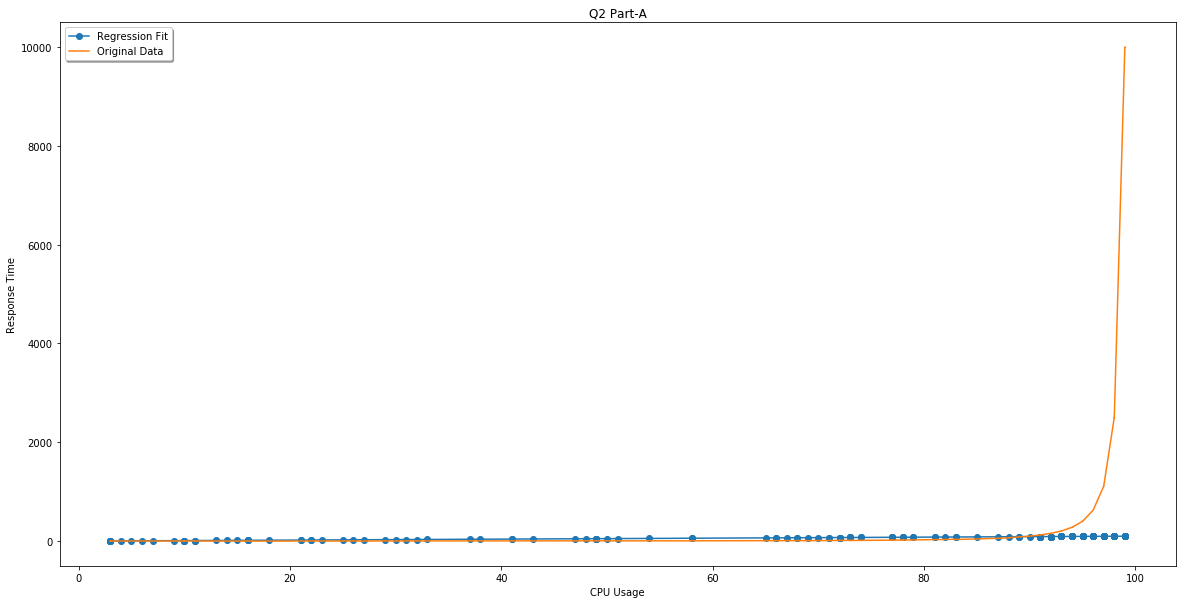

In [14]:
#X = df['CPU Usage']
Prediction = X
print 'SSE:', getSSE(Prediction, Y)
print 'MAPE:', getMAPE(Prediction, Y)
plotGraph(df['CPU Usage'], Prediction, label = 'Q2 Part-A', originalData = True)

### Part-B: Using Predictor 1/(1 - X/100)

SSE: 1274288429.2447855
MAPE: 95.8770902407


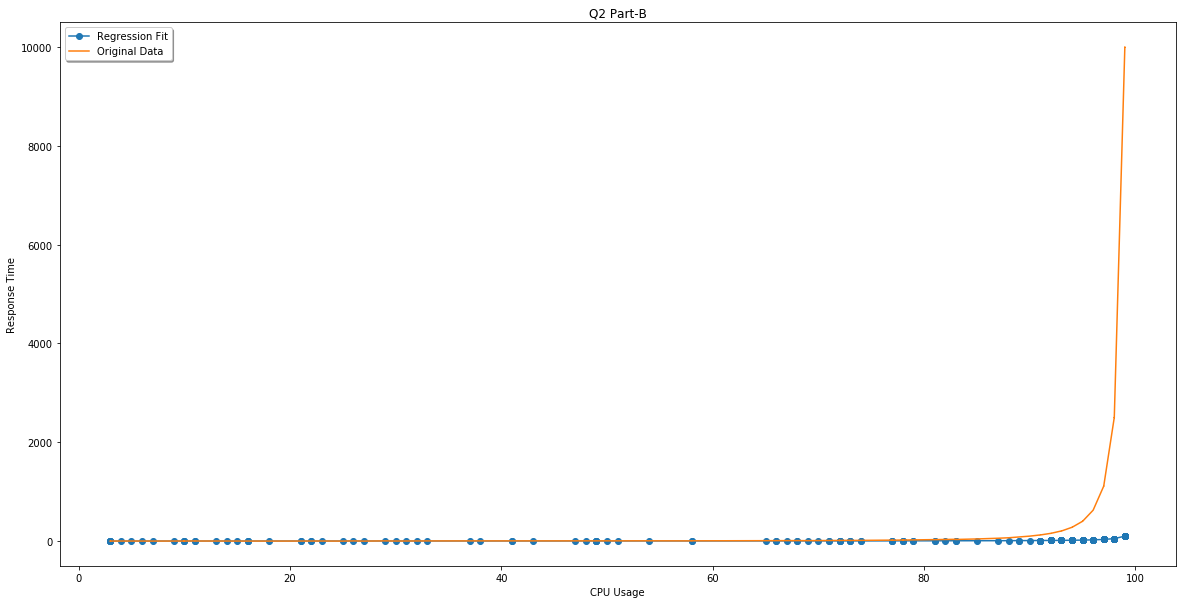

In [15]:
X = df['CPU Usage']
Prediction = 1 / (1 - X/100)
print 'SSE:', getSSE(Prediction, Y)
print 'MAPE:', getMAPE(Prediction, Y)
plotGraph(df['CPU Usage'], Prediction, label = 'Q2 Part-B',originalData = True)

### Part-C: Find Predictor (1/(1 - X/100))^2

SSE: 182.49210398673287
MAPE: 30.3848378918


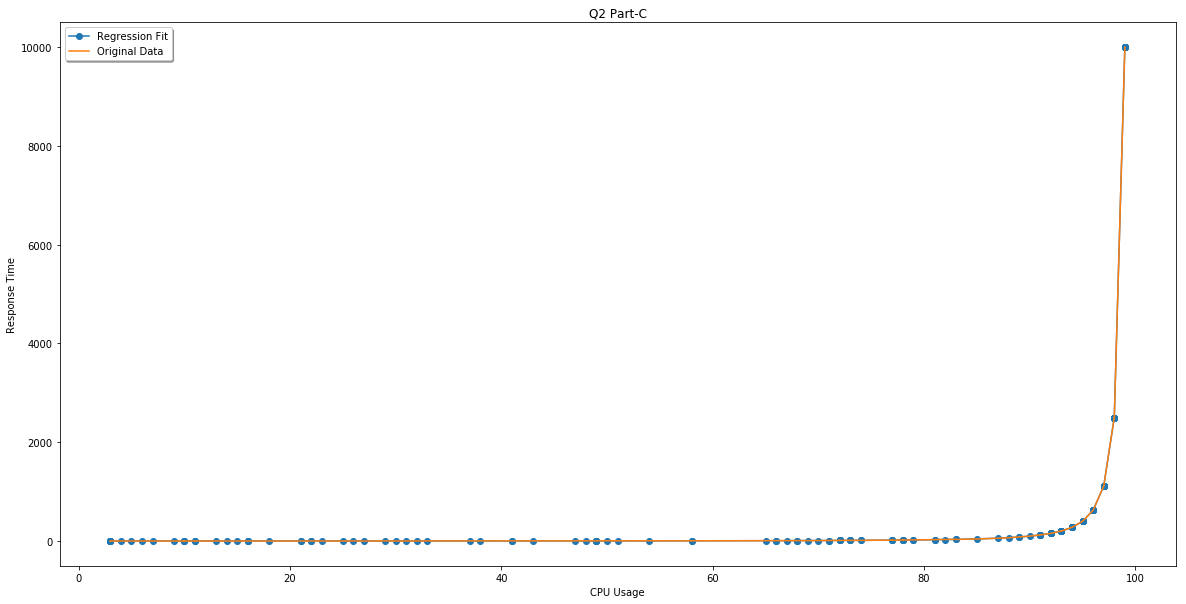

In [16]:
X = df['CPU Usage']
Prediction = np.square(1 / (1 - X/100))
print 'SSE:', getSSE(Prediction, Y)
print 'MAPE:', getMAPE(Prediction, Y)
plotGraph(df['CPU Usage'], Prediction, label = 'Q2 Part-C',originalData = True)

### Values

**Part (A)**

**SSE:** 1267567988.7896922

**MAPE:** 603.77676862
    
**Part (B)**

**SSE:** 1274288429.2447855

**MAPE:** 95.8770902407
    
**Part (C)**

**SSE:** 182.49210398673287

**MAPE:** 30.3848378918

In [39]:
# Another implementation for Part-C
# Finding beta_0 and beta_1 - but not good predictor because it's still Linear

# X = df['CPU Usage']
# Y = df['Response Time']

# Y_bar = np.mean(Y)
# X_bar = np.mean(X)
# #print Y_bar, X_bar

# beta_1 = np.sum((X - X_bar)*((Y - Y_bar))) / np.sum((X - X_bar)**2) 
# print beta_1
# beta_0 = Y_bar - beta_1 * X_bar
# print beta_0

# ## ITERATIVE IMPLEMENTATION FOR VERIFCATION
# num = 0.0
# den = 0.0
# for i in range(0, len(X)):
#     num += (X[i] - X_bar)*(Y[i] - Y_bar)
#     den += (X[i] - X_bar)**2

# beta_1 = num / den
# beta_0 = Y_bar - beta_1 * X_bar
# print beta_1, beta_0
# ## END OF ITERATIVE IMPLEMANTATION

# Prediction = beta_0 + beta_1 * X
# print 'SSE:', getSSE(Prediction, Y)
# print 'MAPE:', getMAPE(Prediction, Y)
# plotGraph(df['CPU Usage'], Prediction, label = 'Q2 Part-C', originalData = True)